In [1]:
# We give an example of how to find the optimal portfolio with 1 risky asset and 1 risk-free asset
# Then we compare it with the strategy that investing mkt 100%

import pandas as pd # To load data, we use the package pandas
import numpy as np # To do mathematical operations, we use the package numpy
import matplotlib.pyplot as plt # To plot the returns data, we use the package matplotlib
%matplotlib inline

# Load the monthly data

factornames = ['time', 'mktrf', 'var3', 'var4', 'rf'] # Give variables' names
df = pd.read_fwf('Factors_July26_July11.dat', colspecs='infer', widths=None, header=None, names=factornames) 

# The returns from the data are in percentage points

mktrf = df['mktrf']/100
rf = df['rf']/100

T = len(df) # The number of obs

gamma = 2.5 # The risk-averse coeff.

mu = mktrf.mean() # The expected mkt excess return
sig2 = mktrf.var() # The var of the mkt excess return
sig = np.sqrt(sig2) # Its vol
Sharpemkt = mu/sig # Its Sharpe ratio

w = (1/gamma)*mu/sig2 # The optimal weight on mkt

Port = [] # A list to store the returns on the portfolio
CC_Port = [] # to store the accumulative returns

Port.append(rf[0] + w*mktrf[0]) # return in the first period
CC_Port.append(1+Port[0])

for i in range(T-1):
    Port.append(rf[i+1] + w*mktrf[i+1]);
    CC_Port.append(CC_Port[i]*(1+Port[i+1]))


ExPort = w*mktrf # excess return of the optimal portfolio
muP = ExPort.mean()
sig2P = ExPort.var()
sigP = np.sqrt(sig2P)
SharpeP = muP/sigP

CC_mkt = []
CC_mkt.append(1+mktrf[0] + rf[0])

for i in range(T-1):
    CC_mkt.append(CC_mkt[i]*(1 + mktrf[i+1] + rf[i+1]))    

In [2]:
print('risk aevrsion and the optimal weight on mkt\n')
print('        {0:.4f}   {1:.4f}\n '.format(gamma, w))

risk aevrsion and the optimal weight on mkt

        2.5000   0.8398
 


In [3]:
print('Excesss Mean, std and Sharpe ratios of the mkt and the optimal portfolio\n')
print('        {0:.4f}   {1:.4f}  {2:.4f}\n '.format(mu, sig, Sharpemkt))
print('        {0:.4f}   {1:.4f}  {2:.4f}\n '.format(muP, sigP, SharpeP))

Excesss Mean, std and Sharpe ratios of the mkt and the optimal portfolio

        0.0062   0.0545  0.1144
 
        0.0052   0.0458  0.1144
 


In [4]:
print('max, min return of  mkt  and the optimal port\n')
print('        {0:.4f}   {1:.4f}\n '.format(max(mktrf), min(mktrf)))
print('        {0:.4f}   {1:.4f}\n '.format(max(Port), min(Port)))

max, min return of  mkt  and the optimal port

        0.3827   -0.2904
 
        0.3224   -0.2436
 


In [5]:
print('Accu return of mkt, and the optimal port\n')
print('        {0:.4f}   {1:.4f}\n '.format(CC_mkt[T-1], CC_Port[T-1]))

Accu return of mkt, and the optimal port

        2540.3984   1439.0687
 


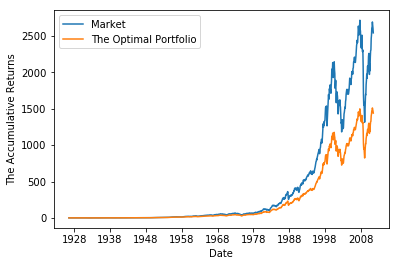

In [6]:
# Plot the accu returns

df.time = pd.to_datetime(df['time'], format='%Y%m')
df.set_index(['time'],inplace=True)

plt.plot(df.index, CC_mkt)
plt.plot(df.index, CC_Port)
plt.ylabel('The Accumulative Returns')
plt.xlabel('Date')
plt.legend(['Market', 'The Optimal Portfolio'], loc='upper left')
plt.show()